<a href="https://colab.research.google.com/github/IvanciuVlad/TBE/blob/master/Homework_TBE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework TBE

Ivanciu Vlad-Marian - 941NA

17.02.2021

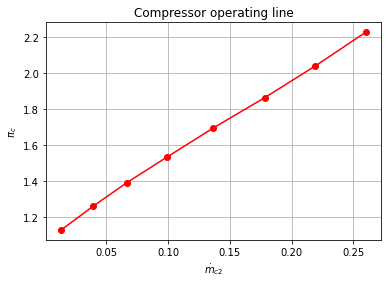

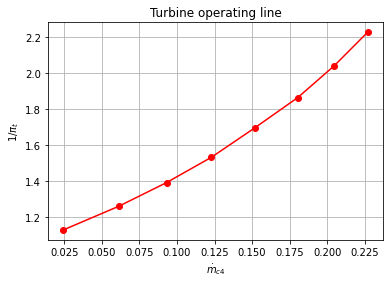

   Pressure ratio for compressor  Isentropic eff compressor  Pressure ratio for turbine  Temp ratio for turbine  Corrected thrust  Corrected thrust specific fuel consumption  Corrected fuel mass flow rate  Corrected Inlet Air Mass Flow Rate
0                       1.127629                   1.599529                    0.970995                0.994673          6.401182                                    0.000216                       0.001449                            0.012895
1                       1.259102                   0.969113                    0.907094                0.982272         15.006921                                    0.000143                       0.002255                            0.037777
2                       1.390574                   0.846512                    0.850504                0.970071         23.758253                                    0.000116                       0.002896                            0.064307
3                       1.531149    

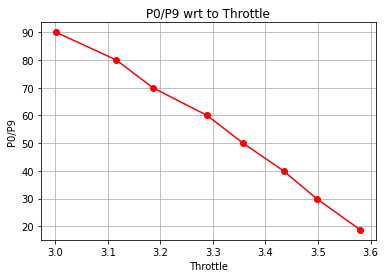

In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import sympy as sp

n = 13  # According to alphabetical order

# Ambient conditions
P0 = (90 + n) * 1000  # in Pa
T0 = (280 + n)  # in K

Pstd = 101325  # in Pa
Tstd = 288.15  # in Pa

rho_air = 1.225  # in kg/m3
rho_fuel = 800  # in kg/m3

hpr = 43000000  # in J/kg low heating value for Jet A

pi_b = 0.95  # Pt4/Pt3
pi_d = 0.96  # Pt2/Pt0
pi_n = 0.98  # Pt9/Pt5
eta_m = 0.97
k_c = 1.4
k_t = 1.28
c_pc = 1.004 * 1000  # in J/kgK
c_pt = 1.25 * 1000  # in J/kgK
tau_r = 1  # Tt0/T0

# Measurement data from given table
throttle = np.array([18.7, 30, 40, 50, 60, 70, 80, 90])
Tt3_av = np.array([22.774, 36.786, 50.248, 61.720, 74.625, 85.303, 97.623, 109.004]) + 273.15  # in K
Tt4_av = np.array([623.250, 635.144, 633.222, 613.627, 603.425, 612.597, 632.710, 674.167]) + 273.15  # in K
Tt9_av = np.array([575.556, 477.671, 473.621, 473.323, 492.090, 474.606, 530.016, 541.263]) + 273.15  # in K
Q_fu_av = np.array([6.380, 9.926, 12.749, 14.872, 16.364, 18.279, 20.456, 22.704])  # in l/h
P3_av = np.array([0.085, 0.215, 0.345, 0.484, 0.645, 0.812, 0.985, 1.170]) * 1e5 + P0  # in Pa
F_av = np.array([6.507, 15.255, 24.151, 34.172, 45.126, 57.596, 70.479, 84.669])  # in N
Q_air_av = np.array([10.612, 31.088, 52.920, 78.507, 108.561, 141.785, 174.177, 206.563])  # in l/s
eta_t = np.array([0.83, 0.84, 0.86, 0.87, 0.883, 0.886, 0.888, 0.89])  # in l/s

# The pressure ratio for the compressor and its isentropic efficiency for each throttling
tau_d = pi_d ** ((k_c - 1) / k_c)

Pt0 = P0
Pt2 = Pt0 * pi_d
Tt0 = T0
Tt2 = Tt0 * tau_d

pi_c = P3_av / Pt2  # Pressure ratio for the compressor
tau_c = Tt3_av / Tt2  # Temperature ratio for compressor
eta_c = (pi_c ** ((k_c - 1) / k_c) - 1) / (tau_c - 1)  # Isentropic efficiency for each throttling

# The pressure ratio and temperature ratio for the turbine for each throttling
tau_lambda = c_pt * Tt4_av / c_pc / T0

# Compute air and fuel mass flow
m0_dot = Q_air_av / 1000 * rho_air
mf_dot = Q_fu_av / 1000 / 3600 * rho_fuel
f = mf_dot / m0_dot

# Compute temperature and pressure ratio of turbine
tau_t = 1 - 1 / eta_m / (1 + f) * tau_r / tau_lambda * (tau_c - 1)  # Temperature ratio for turbine
e_t = np.log(tau_t) / np.log(1 - (1 - tau_t) / eta_t)  # Polytropic Efficiency
pi_t = tau_t ** (k_t / (k_t - 1) / e_t)  # Pressure ratio for turbine

# Corrected thrust, corrected thrust specific fuel consumption, corrected fuel mass flow rate, corrected inlet air mass
# flow rate for each throttling

# Used Parameters
delta0 = Pt0 / Pstd
theta0 = Tt0 / Tstd

# Corrected thrust
F_corrected = F_av / delta0

# Corrected thrust specific fuel consumption
S = mf_dot / F_av
S_corrected = S / np.sqrt(theta0)

# Corrected Fuel Mass Flow Rate
delta2 = Pt2 / Pstd
theta2 = Tt2 / Tstd
mf_dot_corrected = mf_dot / delta2 / np.sqrt(theta2)

# Corrected Inlet Air Mass Flow Rate
m0_dot_corrected = m0_dot * np.sqrt(theta0) / delta0

# Plot the operating line of the compressor and operating line of the turbine
P4_av = pi_b * P3_av

m2_dot_corrected = m0_dot * np.sqrt(theta2) / delta2
theta4 = Tt4_av / Tstd
delta4 = P4_av / Pstd
m4_dot_corrected = (m0_dot + mf_dot) * np.sqrt(theta4) / delta4

# Plots
fig, ax = plt.subplots()
ax.plot(m2_dot_corrected, pi_c, 'r-o')
ax.set(xlabel=r'$\.m_{c2}$', ylabel=r'$\pi_{c}$', title='Compressor operating line')
ax.grid()

plt.show()


fig2, ax2 = plt.subplots()
ax2.plot(m4_dot_corrected, pi_c, 'r-o')
ax2.set(xlabel=r'$\.m_{c4}$', ylabel=r'$1/ \pi_{t}$', title='Turbine operating line')
ax2.grid()

plt.show()

data = {"Pressure ratio for compressor": pi_c,
        "Isentropic eff compressor": eta_c, "Pressure ratio for turbine": pi_t,
        "Temp ratio for turbine": tau_t, "Corrected thrust": F_corrected,
        "Corrected thrust specific fuel consumption": S_corrected, "Corrected fuel mass flow rate": mf_dot_corrected,
        "Corrected Inlet Air Mass Flow Rate": m0_dot_corrected}
df = pandas.DataFrame(data=data)

print(df.to_string())

x = 2/(k_c - 1) 
y = tau_r * tau_c
M9 = np.sqrt(x * (y * tau_t))
pi_r = tau_r ** (k_c / (k_c - 1))
P9 = (P0 * pi_r * (pi_d * pi_c) * pi_b * pi_t *pi_n) / ((M9 * ((k_t - 1)/2) + 1)**(k_t / (k_t - 1)))


fig3, ax3 = plt.subplots()
ax3.plot(P0 / P9, throttle, 'r-o')
ax3.set(xlabel='Throttle', ylabel='P0/P9', title='P0/P9 wrt to Throttle')
ax3.grid()

plt.show()